# Exploratory Data Analysis

## 1. Libraries and packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data import

In [5]:
data = pd.read_csv("Data/german.data", sep = " ", header = None)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
data.shape

(1000, 21)

We can distinguish 21 variables and 1000 observations in our dataset.

In [8]:
data.columns = ["Checking_account_status", "Credit_duration", "Credit_history", "Purpose", "Credit_amount", 
                "Savings", "Employment_duration", "Installment_rate", "Status_and_sex", "Other_debtors_guarantors",
               "Residence_duration", "Property", "Age", "Other_installment_plans", "Housing", "No_of_credits", "Job",
               "No_of_people", "Telephone", "Foreign_worker", "Customer"]

We assigned the column names to our dataset so as to make it more readable.

In [9]:
data["Checking_account_status"] = ['<0 DM' if x == 'A11' else '0<=...<200 DM' if x == 'A12' else '>=200 DM' if x == 'A13' 
               else 'no account' for x in data["Checking_account_status"]]

data["Credit_history"] = ['no credits/ all paid back' if x == 'A30' 
                           else 'all credits at this bank paid back' if x == 'A31' 
                           else 'credits paid back till now' if x == 'A32'
                           else 'delay in paying off in the past' if x == 'A33'
                           else 'critical account/ other credits (not this bank)'
                           for x in data["Credit_history"]]

data["Purpose"] = ['new car' if x == 'A40' else 'used car' if x == 'A41' 
                           else 'furniture/ equipment' if x == 'A42' else 'radio/ television' if x == 'A43'
                           else 'domestic appliances' if x == 'A44' else 'repairs' if x == 'A45'
                           else 'education' if x == 'A46' else 'vacation' if x == 'A47'
                           else 'retraining' if x == 'A48' else 'business' if x == 'A49'
                           else 'others'
                           for x in data["Purpose"]]

data["Savings"] = ['<100 DM' if x == 'A61' else '100<=...<500 DM' if x == 'A62' 
                           else '500<=...<1000 DM' if x == 'A63' else '>=1000 DM' if x == 'A64'
                           else 'unknow/ no savings'
                           for x in data["Savings"]]

data["Employment_duration"] = ['unemployed' if x == 'A71' else '<1y' if x == 'A72' 
                           else '1<=...<4y' if x == 'A73' else '4<=...<7y' if x == 'A74'
                           else '>= 7y'
                           for x in data["Employment_duration"]]

data["Status_and_sex"] = ['male & divorced/separated' if x == 'A91' else 'female & divorced/ separated/ married' if x == 'A92'
                         else 'male & single' if x == 'A93' else 'male & married/ widowed' if x == 'A94' 
                         else 'female & single'
                         for x in data["Status_and_sex"]]

data["Other_debtors_guarantors"] = ['none' if x == 'A101' else 'co-applicant' if x == 'A102'
                                   else 'guarator'
                                   for x in data["Other_debtors_guarantors"]]

data["Property"] = ['real estate' if x == 'A121' else 'building society/ life insurance' if x == 'A122'
                   else 'car or other' if x == 'A123' else 'unknown/ no property'
                   for x in data["Property"]]

data["Other_installment_plans"] = ['bank' if x == 'A141' else 'stores' if x == 'A142'
                                  else 'none'
                                  for x in data["Other_installment_plans"]]

data["Housing"] = ['rent' if x == 'A151' else 'own' if x == 'A152' else 'for free'
                  for x in data["Housing"]]

data["Job"] = ['unemployed/ unskilled non-resident' if x == 'A171' else 'unskilled resident' if x == 'A172'
              else 'skilled employee' if x == 'A173' else 'management/ self-employed/ officer'
              for x in data["Job"]]

data["Telephone"] = ['none' if x == 'A191' else 'yes'
                    for x in data["Telephone"]]

data["Foreign_worker"] = ['yes' if x == 'A201' else 'no'
                         for x in data["Foreign_worker"]]

Based on datset description we assigned the values of the variable

In [10]:
data.head()

,Checking_account_status,Credit_duration,Credit_history,Purpose,Credit_amount,Savings,Employment_duration,Installment_rate,Status_and_sex,Other_debtors_guarantors,...,Property,Age,Other_installment_plans,Housing,No_of_credits,Job,No_of_people,Telephone,Foreign_worker,Customer
0,<0 DM,6,critical account/ other credits (not this bank),radio/ television,1169,unknow/ no savings,>= 7y,4,male & single,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,0<=...<200 DM,48,credits paid back till now,radio/ television,5951,<100 DM,1<=...<4y,2,female & divorced/ separated/ married,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,no account,12,critical account/ other credits (not this bank),education,2096,<100 DM,4<=...<7y,2,male & single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0 DM,42,credits paid back till now,furniture/ equipment,7882,<100 DM,4<=...<7y,2,male & single,guarator,...,building society/ life insurance,45,none,for free,1,skilled employee,2,none,yes,1
4,<0 DM,24,delay in paying off in the past,new car,4870,<100 DM,1<=...<4y,3,male & single,none,...,unknown/ no property,53,none,for free,2,skilled employee,2,none,yes,2


## 3. Data exploration

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Checking_account_status     1000 non-null object
Credit_duration             1000 non-null int64
Credit_history              1000 non-null object
Purpose                     1000 non-null object
Credit_amount               1000 non-null int64
Savings                     1000 non-null object
Employment_duration         1000 non-null object
Installment_rate            1000 non-null int64
Status_and_sex              1000 non-null object
Other_debtors_guarantors    1000 non-null object
Residence_duration          1000 non-null int64
Property                    1000 non-null object
Age                         1000 non-null int64
Other_installment_plans     1000 non-null object
Housing                     1000 non-null object
No_of_credits               1000 non-null int64
Job                         1000 non-null object
No_of_people                1000 non-null int64
Telephone          

In [12]:
data.isnull().sum()

Checking_account_status     0
Credit_duration             0
Credit_history              0
Purpose                     0
Credit_amount               0
Savings                     0
Employment_duration         0
Installment_rate            0
Status_and_sex              0
Other_debtors_guarantors    0
Residence_duration          0
Property                    0
Age                         0
Other_installment_plans     0
Housing                     0
No_of_credits               0
Job                         0
No_of_people                0
Telephone                   0
Foreign_worker              0
Customer                    0
dtype: int64

We can notice that there are no missig values in dataset.

(0, 8)

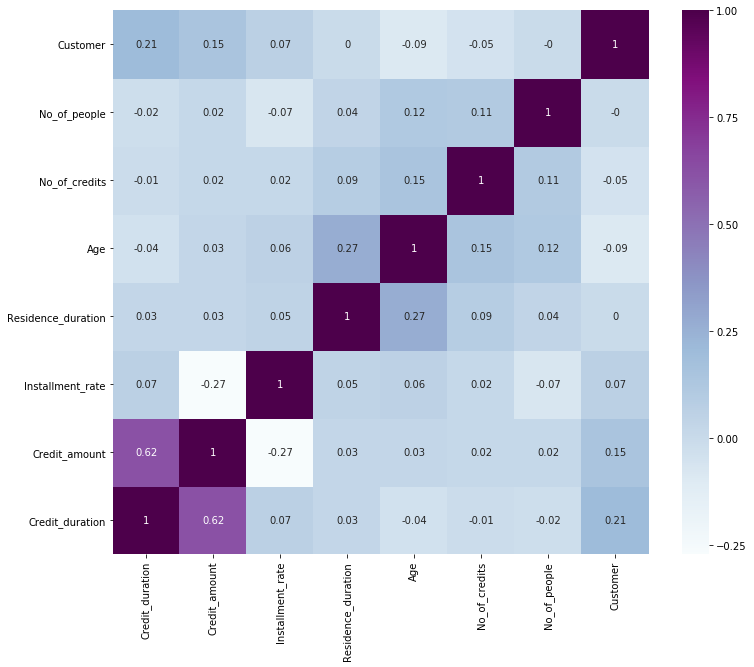

In [13]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr().round(2)
ax = sns.heatmap(data=correlation_matrix, annot = True, cmap="BuPu")
ax.set_ylim(0,8)

We can notice quite high correlation between the variables **Credit_amount** and **Credit_duration**, which seems to be logical. The correlation is lower than 70% percent therefore both variables will stay in the model.

Target variable **Customer**

In [14]:
customer_count = data['Customer'].value_counts()
customer_count

1    700
2    300
Name: Customer, dtype: int64

In [15]:
customer_count[1] / customer_count[2]

2.3333333333333335

Target class is imbalanced as there is over twice more good customers than bad customer. Imbalanced data is common issue in credit scoring models.

In [16]:
data.loc[data['Customer'] == 2, 'Customer'] = 0

We assigned the value 0 for bad customers.

In [17]:
customer_count = data['Customer'].value_counts()
customer_count

1    700
0    300
Name: Customer, dtype: int64

We create the list that will store categorical variables 

In [18]:
categorical_variables = []

Variable **Checking_account_status**

In [19]:
data['Checking_account_status'].value_counts()

no account       394
<0 DM            274
0<=...<200 DM    269
>=200 DM          63
Name: Checking_account_status, dtype: int64

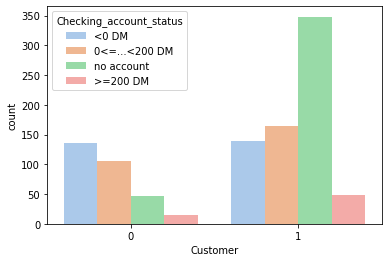

In [20]:
sns.countplot(x='Customer', hue='Checking_account_status', data=data, palette="pastel")

In [21]:
categorical_variables.append('Checking_account_status')

Variable **Credit_duration**

In [22]:
data['Credit_duration'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Credit_duration, dtype: float64

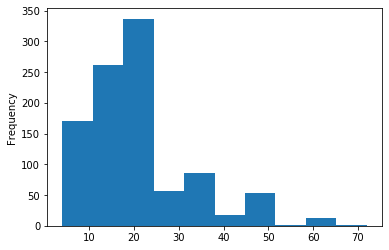

In [23]:
data['Credit_duration'].plot.hist(bins=10)

The variable has a skewed distribution. Therefore we do the logaritmic transformation so as to normalize data. 

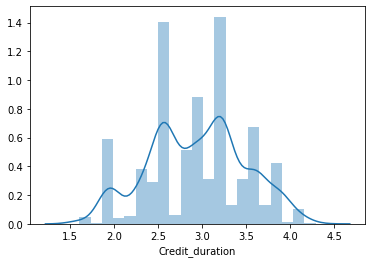

In [24]:
sns.distplot(np.log1p(data['Credit_duration']))

In [25]:
data['Credit_duration'] = np.log1p(data['Credit_duration'])

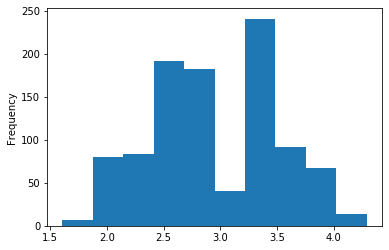

In [26]:
data['Credit_duration'].plot.hist(bins=10)

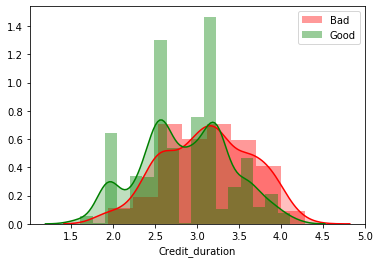

In [27]:
sns.distplot(data[data['Customer'] == 0]['Credit_duration'], hist=True, color="r", kde_kws={"shade": True}, label='Bad')
sns.distplot(data[data['Customer'] == 1]['Credit_duration'], hist=True, color="g", kde_kws={"shade": True}, label='Good')
plt.legend()

Variable **Credit_history**

In [28]:
data['Credit_history'].value_counts()

credits paid back till now                         530
critical account/ other credits (not this bank)    293
delay in paying off in the past                     88
all credits at this bank paid back                  49
no credits/ all paid back                           40
Name: Credit_history, dtype: int64

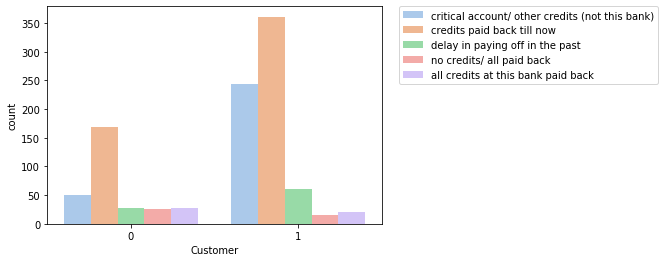

In [29]:
sns.countplot(x='Customer', hue='Credit_history', data=data, palette="pastel")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [30]:
categorical_variables.append('Credit_history')

Variable **Purpose**

In [31]:
data['Purpose'].value_counts()

radio/ television       280
new car                 234
furniture/ equipment    181
used car                103
business                 97
education                50
repairs                  22
others                   12
domestic appliances      12
retraining                9
Name: Purpose, dtype: int64

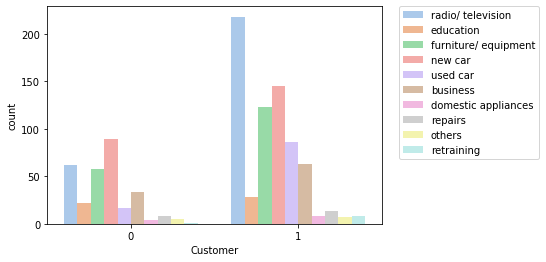

In [32]:
sns.countplot(x='Customer', hue='Purpose', data=data, palette="pastel")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [33]:
categorical_variables.append('Purpose')

Variable **Credit_amount**

In [34]:
data['Credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit_amount, dtype: float64

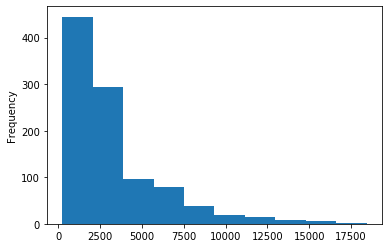

In [35]:
data['Credit_amount'].plot.hist(bins=10)

The variable has a skewed distribution. Therefore we do the logaritmic transformation so as to normalize data. 

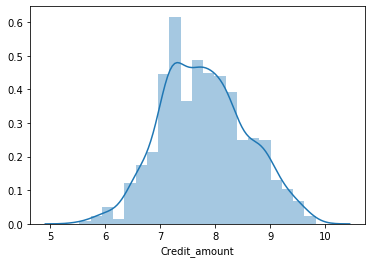

In [36]:
sns.distplot(np.log1p(data['Credit_amount']))

In [37]:
data['Credit_amount'] = np.log1p(data['Credit_amount'])

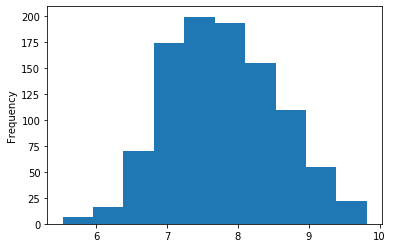

In [38]:
data['Credit_amount'].plot.hist(bins=10)

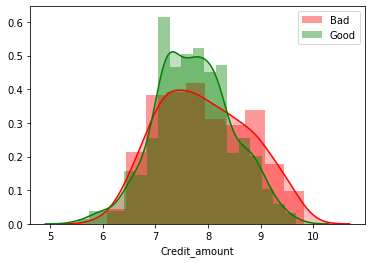

In [39]:
sns.distplot(data[data['Customer'] == 0]['Credit_amount'], hist=True, color="r", kde_kws={"shade": True}, label='Bad')
sns.distplot(data[data['Customer'] == 1]['Credit_amount'], hist=True, color="g", kde_kws={"shade": True}, label='Good')
plt.legend()

Variable **Savings**

In [40]:
data['Savings'].value_counts()

<100 DM               603
unknow/ no savings    183
100<=...<500 DM       103
500<=...<1000 DM       63
>=1000 DM              48
Name: Savings, dtype: int64

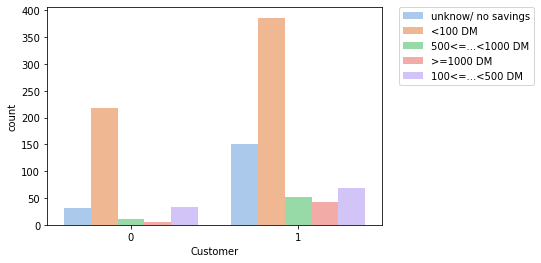

In [41]:
sns.countplot(x='Customer', hue='Savings', data=data, palette="pastel")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [42]:
categorical_variables.append('Savings')

Variable **Employment_duration**

In [43]:
data['Employment_duration'].value_counts()

1<=...<4y     339
>= 7y         253
4<=...<7y     174
<1y           172
unemployed     62
Name: Employment_duration, dtype: int64

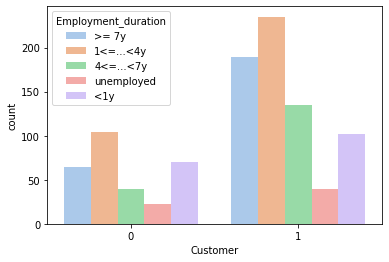

In [44]:
sns.countplot(x='Customer', hue='Employment_duration', data=data, palette="pastel")

In [45]:
categorical_variables.append('Employment_duration')

Variable **Installment_rate**

In [46]:
data['Installment_rate'].value_counts()

4    476
2    231
3    157
1    136
Name: Installment_rate, dtype: int64

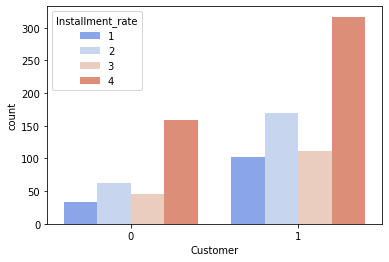

In [47]:
sns.countplot(x='Customer', hue = 'Installment_rate', data=data, palette="coolwarm")

In [48]:
categorical_variables.append('Installment_rate')

Variable **Status_and_sex**

In [49]:
data['Status_and_sex'].value_counts()

male & single                            548
female & divorced/ separated/ married    310
male & married/ widowed                   92
male & divorced/separated                 50
Name: Status_and_sex, dtype: int64

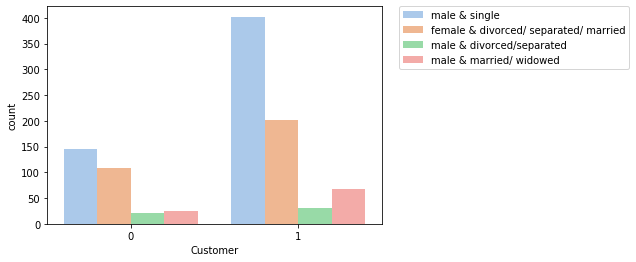

In [50]:
sns.countplot(x='Customer', hue='Status_and_sex', data=data, palette="pastel")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [51]:
categorical_variables.append('Status_and_sex')

Variable **Other_debtors_guarantors**

In [52]:
data['Other_debtors_guarantors'].value_counts()

none            907
guarator         52
co-applicant     41
Name: Other_debtors_guarantors, dtype: int64

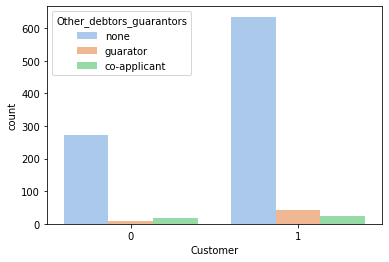

In [53]:
sns.countplot(x='Customer', hue='Other_debtors_guarantors', data=data, palette="pastel")
#plt.yscale('log')

In [54]:
categorical_variables.append('Other_debtors_guarantors')

Variable **Residence_duration**

In [55]:
data['Residence_duration'].value_counts()

4    413
2    308
3    149
1    130
Name: Residence_duration, dtype: int64

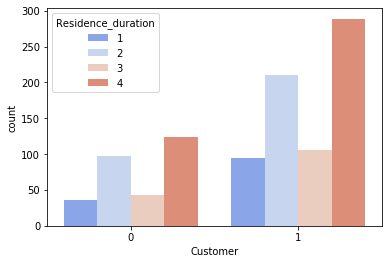

In [56]:
sns.countplot(x='Customer', hue = 'Residence_duration', data=data, palette="coolwarm")

In [57]:
categorical_variables.append('Residence_duration')

Variable **Property**

In [58]:
data['Property'].value_counts()

car or other                        332
real estate                         282
building society/ life insurance    232
unknown/ no property                154
Name: Property, dtype: int64

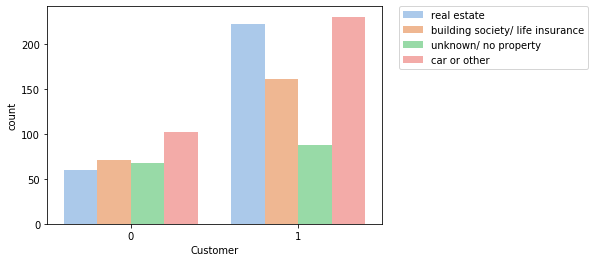

In [59]:
sns.countplot(x='Customer', hue='Property', data=data, palette="pastel")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [60]:
categorical_variables.append('Property')

Variable **Age**

In [61]:
data['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

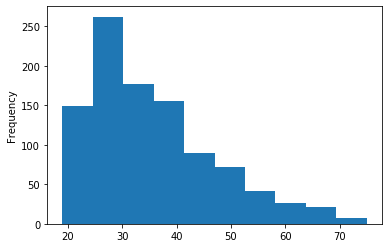

In [62]:
data['Age'].plot.hist(bins=10)

The variable has a skewed distribution. Therefore we do the logaritmic transformation so as to normalize data. 

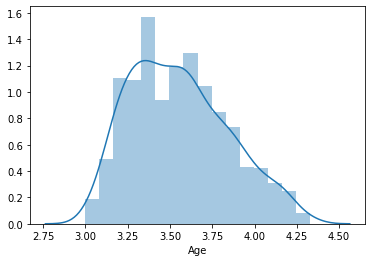

In [63]:
sns.distplot(np.log1p(data['Age']))

In [64]:
data['Age'] = np.log1p(data['Age'])

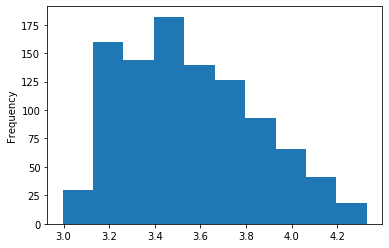

In [65]:
data['Age'].plot.hist(bins=10)

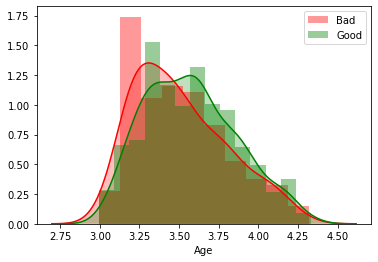

In [66]:
sns.distplot(data[data['Customer'] == 0]['Age'], hist=True, color="r", kde_kws={"shade": True}, label='Bad')
sns.distplot(data[data['Customer'] == 1]['Age'], hist=True, color="g", kde_kws={"shade": True}, label='Good')
plt.legend()

Variable **Other_installment_plans**

In [67]:
data['Other_installment_plans'].value_counts()

none      814
bank      139
stores     47
Name: Other_installment_plans, dtype: int64

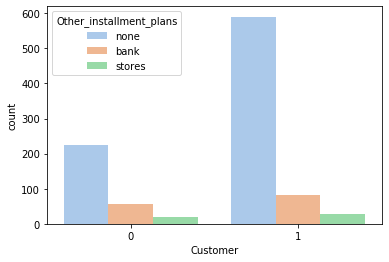

In [68]:
sns.countplot(x='Customer', hue='Other_installment_plans', data=data, palette="pastel")

In [69]:
categorical_variables.append('Other_installment_plans')

Variable **Housing**

In [70]:
data['Housing'].value_counts()

own         713
rent        179
for free    108
Name: Housing, dtype: int64

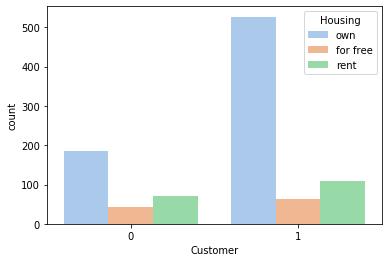

In [71]:
sns.countplot(x='Customer', hue='Housing',data=data, palette="pastel")

In [72]:
categorical_variables.append('Housing')

Variable **No_of_credits**

In [73]:
data['No_of_credits'].value_counts()

1    633
2    333
3     28
4      6
Name: No_of_credits, dtype: int64

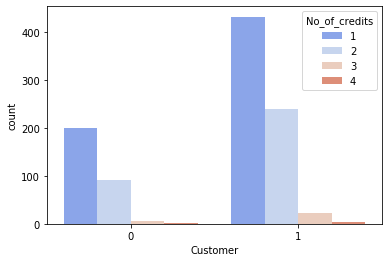

In [74]:
sns.countplot(x='Customer', hue='No_of_credits', data=data, palette="coolwarm")

In [75]:
data['No_of_credits'].value_counts()

1    633
2    333
3     28
4      6
Name: No_of_credits, dtype: int64

In [76]:
categorical_variables.append('No_of_credits')

Variable **Job**

In [77]:
data['Job'].value_counts()

skilled employee                      630
unskilled resident                    200
management/ self-employed/ officer    148
unemployed/ unskilled non-resident     22
Name: Job, dtype: int64

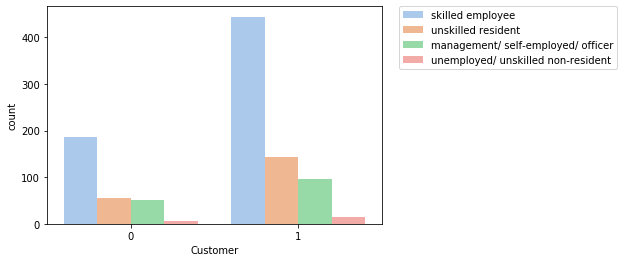

In [78]:
sns.countplot(x='Customer',hue='Job',data=data, palette="pastel")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [79]:
categorical_variables.append('Job')

Variable **No_of_people**

In [80]:
data['No_of_people'].value_counts()

1    845
2    155
Name: No_of_people, dtype: int64

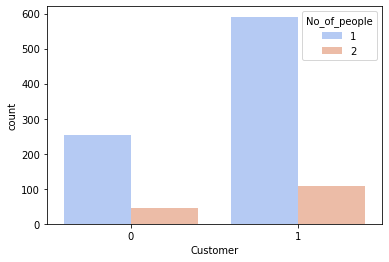

In [81]:
sns.countplot(x='Customer', hue='No_of_people', data=data, palette="coolwarm")

In [82]:
categorical_variables.append('No_of_people')

Variable **Telephone**

In [83]:
data['Telephone'].value_counts()

none    596
yes     404
Name: Telephone, dtype: int64

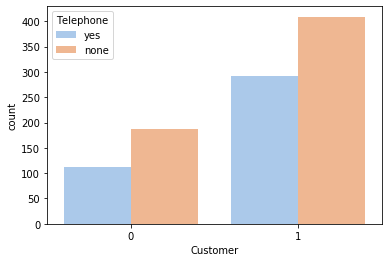

In [84]:
sns.countplot(x='Customer',hue='Telephone', data=data, palette="pastel")

In [85]:
categorical_variables.append('Telephone')

Variable **Foreign_worker**

In [86]:
data['Foreign_worker'].value_counts()

yes    963
no      37
Name: Foreign_worker, dtype: int64

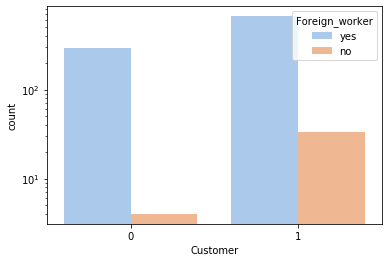

In [87]:
sns.countplot(x='Customer', hue='Foreign_worker', data=data, palette="pastel")
plt.yscale('log')

In [88]:
categorical_variables.append('Foreign_worker')

## 4. Final modification

Categorical variables will be converted into dummy variables and continuous variables will be scaled.

In [89]:
categorical_variables

['Checking_account_status',
 'Credit_history',
 'Purpose',
 'Savings',
 'Employment_duration',
 'Installment_rate',
 'Status_and_sex',
 'Other_debtors_guarantors',
 'Residence_duration',
 'Property',
 'Other_installment_plans',
 'Housing',
 'No_of_credits',
 'Job',
 'No_of_people',
 'Telephone',
 'Foreign_worker']

In [90]:
continuous_variables = data.drop(categorical_variables, axis=1).columns.tolist()
continuous_variables

['Credit_duration', 'Credit_amount', 'Age', 'Customer']

In [91]:
continuous_variables.remove('Customer')

In [92]:
data = pd.get_dummies(data=data, columns=categorical_variables)

In [93]:
data.head()

,Credit_duration,Credit_amount,Age,Customer,Checking_account_status_0<=...<200 DM,Checking_account_status_<0 DM,Checking_account_status_>=200 DM,Checking_account_status_no account,Credit_history_all credits at this bank paid back,Credit_history_credits paid back till now,...,Job_management/ self-employed/ officer,Job_skilled employee,Job_unemployed/ unskilled non-resident,Job_unskilled resident,No_of_people_1,No_of_people_2,Telephone_none,Telephone_yes,Foreign_worker_no,Foreign_worker_yes
0,1.945910,7.064759,4.219508,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
1,3.891820,8.691483,3.135494,0,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,1
2,2.564949,7.648263,3.912023,1,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,1
3,3.761200,8.972464,3.828641,1,0,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
4,3.218876,8.491055,3.988984,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1


In [94]:
columns = data.drop('Customer', inplace = False, axis = 1).columns.values

In [95]:
np.save("./Data/columns.npy",columns)

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


col_transformer = ColumnTransformer([
        ('scaler', StandardScaler(), continuous_variables)
    ], remainder='passthrough')

In [97]:
X = col_transformer.fit_transform(data.drop('Customer', inplace=False, axis=1))

In [98]:
X

array([[-1.82205598, -0.9339919 ,  2.28287944, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.74120559,  1.16314927, -1.43877664, ...,  0.        ,
         0.        ,  1.        ],
       [-0.68849973, -0.18174959,  1.22721702, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.68849973, -1.41603828,  0.37419467, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.62551528, -0.34610292, -1.29266015, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.62551528,  0.82450264, -0.76342705, ...,  0.        ,
         0.        ,  1.        ]])

In [99]:
X.shape

(1000, 71)

In [100]:
y = data['Customer'].values

## 5. Save explanatory and explained variables

In [101]:
np.save("./Data/X.npy",X)
np.save("./Data/y.npy",y)